In [ ]:
#step1:importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
data = pd.read_csv('Train.csv')
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


#step2 Data Structure and Content

In [ ]:
#step2 Data Structure and Content
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
  Item_Identifier  Item_Weight Item_Fat_

# step3Univariate Analysis

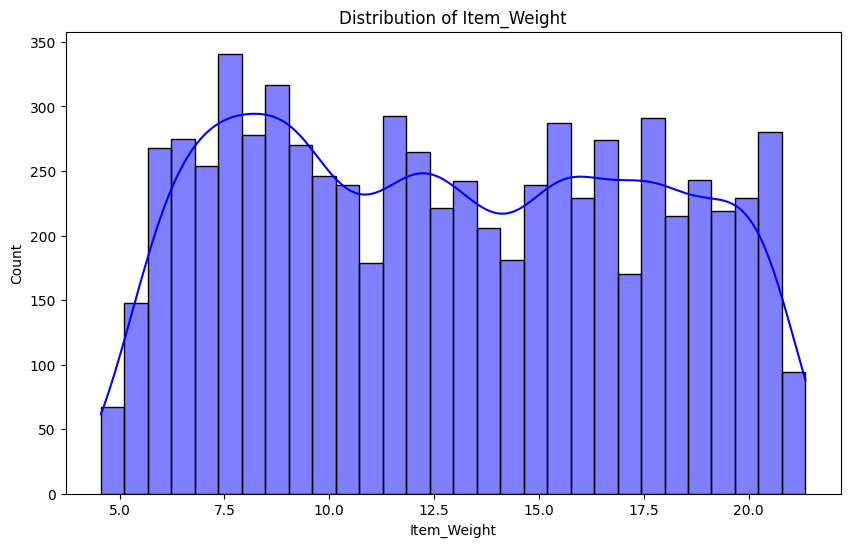

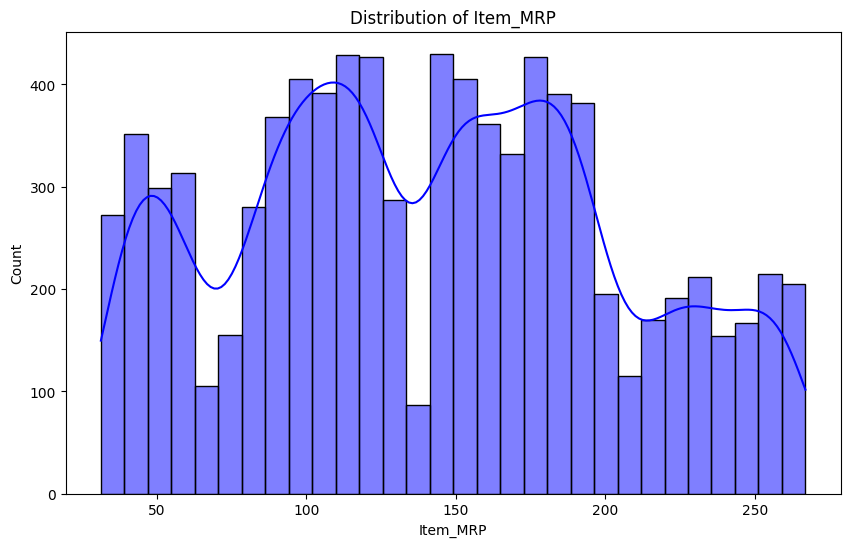

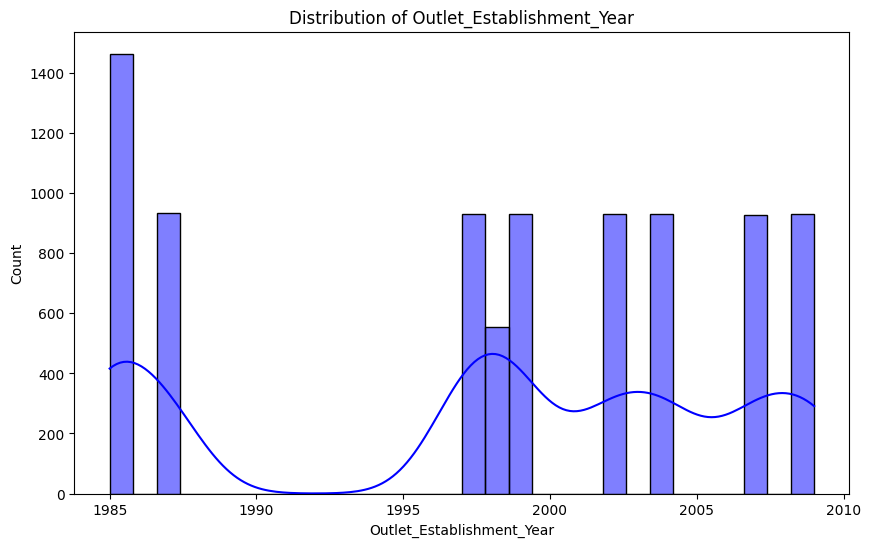

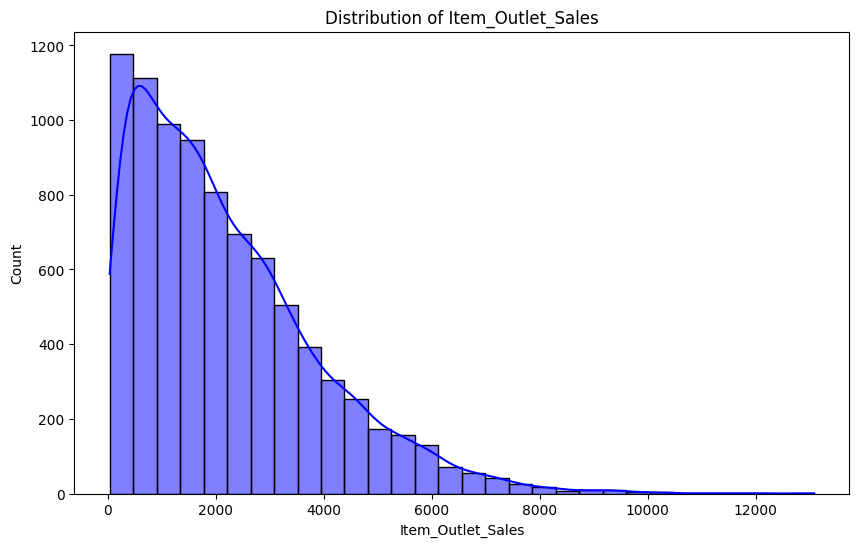

In [ ]:
# step3Univariate Analysis

# Univariate Analysis - Numerical Variables
numerical_columns = ['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
categorical_columns = ['Item_Fat', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


# Plot histograms for numerical variables
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

# step4. Bivariate Analysis

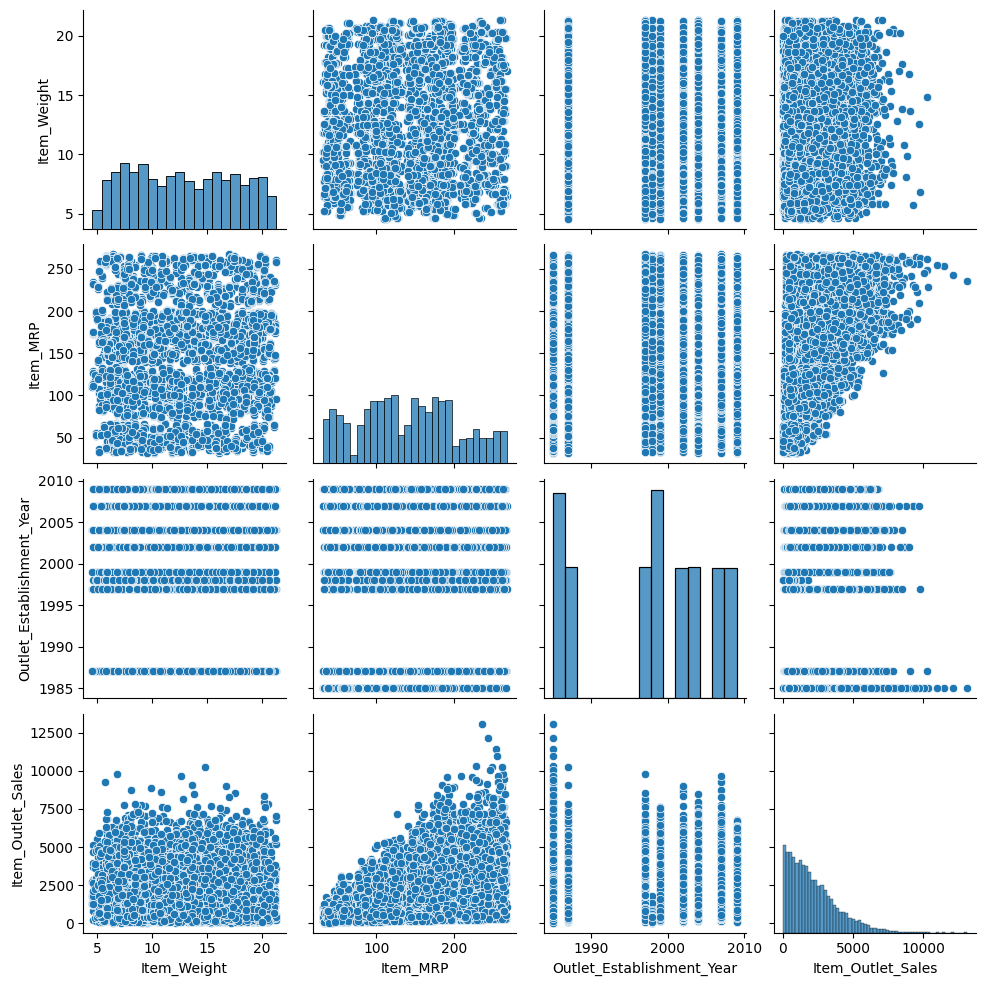

In [ ]:
# step4. Bivariate Analysis
# Explore relationships between pairs of variables
# 4.1 Scatterplots
# Explore relationships between pairs of variables using scatterplots
sns.pairplot(data, vars=numerical_columns)
plt.show()


Correlation Matrix:
                           Item_Weight  Item_MRP  Outlet_Establishment_Year  \
Item_Weight                   1.000000  0.027141                  -0.011588   
Item_MRP                      0.027141  1.000000                   0.005020   
Outlet_Establishment_Year    -0.011588  0.005020                   1.000000   
Item_Outlet_Sales             0.014123  0.567574                  -0.049135   

                           Item_Outlet_Sales  
Item_Weight                         0.014123  
Item_MRP                            0.567574  
Outlet_Establishment_Year          -0.049135  
Item_Outlet_Sales                   1.000000  


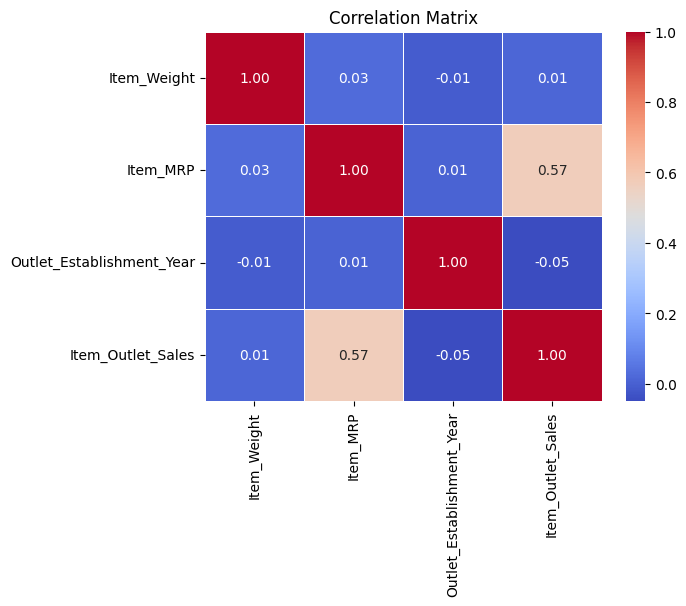

In [ ]:
# 4.2 Correlation Coefficients
# Calculating correlation coefficients between numerical variables
correlation_matrix = data[numerical_columns].corr()
print("Correlation Matrix:")
print(correlation_matrix)
# Visualizing the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# 4.3 Simple Linear Regression using OLS Regression Results
import statsmodels.api as sm

# simple linear regression for 'Item_MRP' and 'Item_Outlet_Sales'
X_ols = sm.add_constant(data['Item_MRP'])  # Add a constant term to the predictor
ols_model = sm.OLS(data['Item_Outlet_Sales'], X_ols).fit()

#  regression results
print("OLS Regression Results for Item_MRP and Item_Outlet_Sales:")
print(ols_model.summary())

OLS Regression Results for Item_MRP and Item_Outlet_Sales:
                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     4049.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:54:19   Log-Likelihood:                -73866.
No. Observations:                8523   AIC:                         1.477e+05
Df Residuals:                    8521   BIC:                         1.478e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

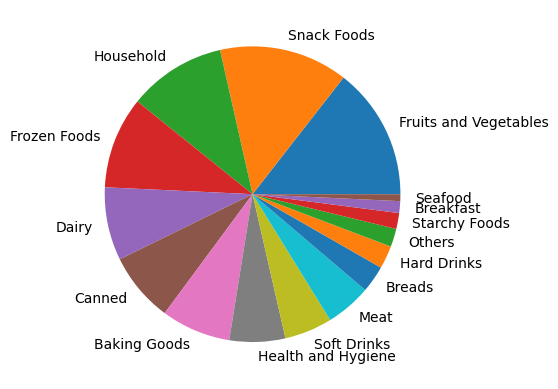

In [ ]:
plt.pie(data['Item_Type'].value_counts(), labels=data['Item_Type'].value_counts().index)
plt.show()

# step6 exploratory Data Analysis

In [ ]:
#checking correlation between Outlet_Identifier and target column
count_identifier = data.select_dtypes(include=['object']).copy()


In [ ]:
count_identifier["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:

data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

<ipython-input-220-99f071fd136d>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_encoded.corr()


Item_Weight                  0.011550
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Outlet_Identifier_OUT013     0.024170
Outlet_Identifier_OUT017     0.032610
Outlet_Identifier_OUT018    -0.038059
Outlet_Identifier_OUT019    -0.277250
Outlet_Identifier_OUT027     0.311192
Outlet_Identifier_OUT035     0.052823
Outlet_Identifier_OUT045     0.002274
Outlet_Identifier_OUT046     0.019803
Outlet_Identifier_OUT049     0.034264
Name: Item_Outlet_Sales, dtype: float64


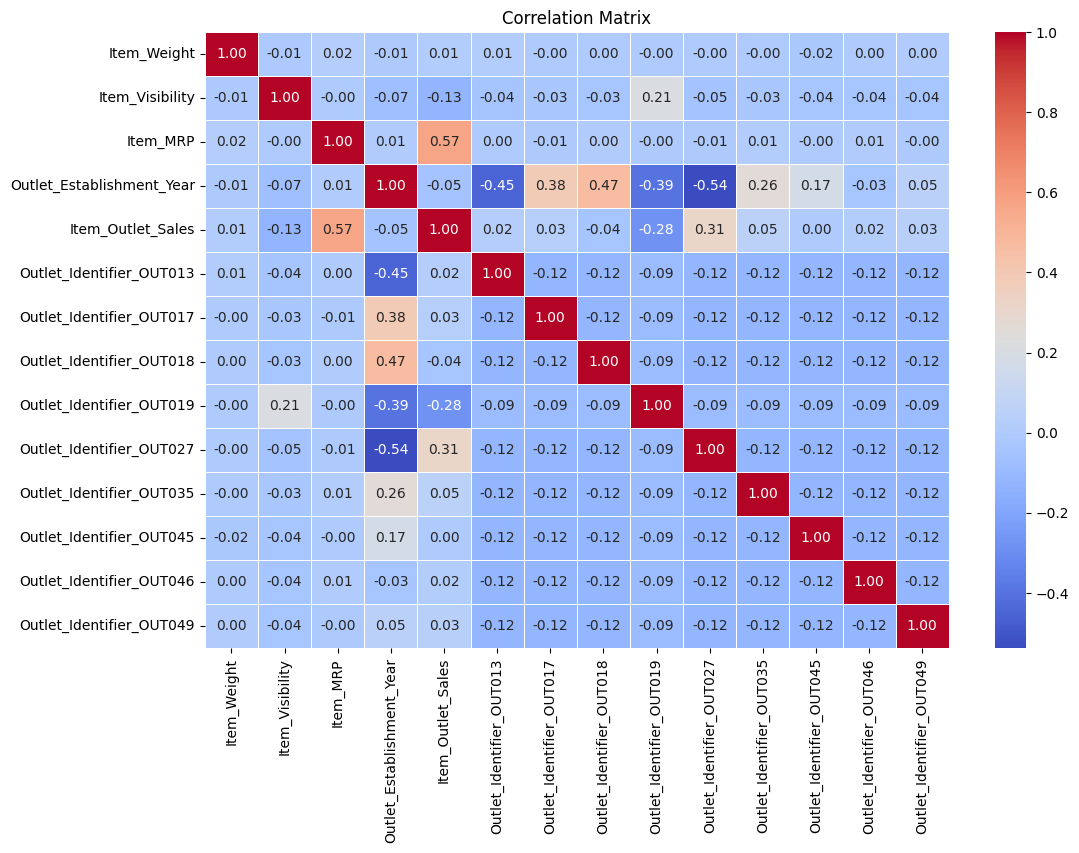

In [ ]:
import seaborn as sns

# Convert Outlet_Identifier to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Outlet_Identifier'], drop_first=True)

# Calculate correlation matrix
correlation_matrix = data_encoded.corr()

# Display correlation matrix
print(correlation_matrix['Item_Outlet_Sales'])

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



as correlation between them is strong we will keep outliers identifer column as it is

In [ ]:
#step5droping unwanted columns
print(data.columns)

# Drop the columns
columns_to_drop = [ 'Item_Identifier']
data.drop(columns_to_drop, axis=1, inplace=True)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [ ]:
print(data.columns)

# Drop the columns
columns_to_drop = [ 'Outlet_Establishment_Year']
data.drop(columns_to_drop, axis=1, inplace=True)

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')


In [ ]:


non_zero_visibility_median = data[data['Item_Visibility'] != 0]['Item_Visibility'].median()
data['Item_Visibility'] = data['Item_Visibility'].replace(0, non_zero_visibility_median)
data.head(30)



,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200000,Regular,0.057792,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800
4,8.930000,Low Fat,0.057792,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052
5,10.395000,Regular,0.057792,Baking Goods,51.4008,OUT018,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,High,Tier 3,Supermarket Type1,343.5528
7,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,Medium,Tier 2,Supermarket Type1,1076.5986
9,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,Medium,Tier 2,Supermarket Type1,4710.5350


#step7encoding techniques

In [ ]:
#step6encoding techniques
#for more than 5 unique values in a column we will use label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Outlet_Identifier'] = le.fit_transform(data['Outlet_Identifier'])
data['Item_Type'] = le.fit_transform(data['Item_Type'])
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])


In [ ]:
unique_fat_content_values = data['Item_Fat_Content'].unique()
print("Unique values in 'Item_Fat_Content' column:", unique_fat_content_values)


Unique values in 'Item_Fat_Content' column: [1 2 3 0 4]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
data = pd.get_dummies(data, columns=['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])
data.head(20)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300000,1,0.016047,4,249.8092,9,3735.1380,0,1,0,1,0,0,0,1,0,0
1,5.920000,2,0.019278,14,48.2692,3,443.4228,0,1,0,0,0,1,0,0,1,0
2,17.500000,1,0.016760,10,141.6180,9,2097.2700,0,1,0,1,0,0,0,1,0,0
3,19.200000,2,0.057792,6,182.0950,0,732.3800,0,1,0,0,0,1,1,0,0,0
4,8.930000,1,0.057792,9,53.8614,1,994.7052,1,0,0,0,0,1,0,1,0,0
5,10.395000,2,0.057792,0,51.4008,3,556.6088,0,1,0,0,0,1,0,0,1,0
6,13.650000,2,0.012741,13,57.6588,1,343.5528,1,0,0,0,0,1,0,1,0,0
7,12.857645,1,0.127470,13,107.7622,5,4022.7636,0,1,0,0,0,1,0,0,0,1
8,16.200000,2,0.016687,5,96.9726,7,1076.5986,0,1,0,0,1,0,0,1,0,0
9,19.200000,2,0.094450,5,187.8214,2,4710.5350,0,1,0,0,1,0,0,1,0,0


# step8splitting training and testing

In [ ]:
#splitting training and testing
from sklearn.model_selection import train_test_split

features = data.drop('Item_Outlet_Sales', axis=1)
target = data['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
X_train.values

array([[9.5000000e+00, 2.0000000e+00, 3.5205866e-02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.8000000e+01, 1.0000000e+00, 4.7473135e-02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.7600000e+01, 2.0000000e+00, 7.6121831e-02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.7600000e+01, 1.0000000e+00, 1.8943666e-02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.0350000e+01, 3.0000000e+00, 5.4362695e-02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6350000e+01, 0.0000000e+00, 1.6993204e-02, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [ ]:
y_train = y_train.values[:, np.newaxis]
y_test = y_test.values[:, np.newaxis]
X_train.columns = X_test.columns.tolist()

#step9standardization

In [ ]:
#step9standardization
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train.iloc[:, [0, 2, 4]] = scaler.fit_transform(X_train.iloc[:, [0, 2, 4]])

# Transform the test data using the scaling parameters from the training data
X_test.iloc[:, [0, 2, 4]] = scaler.transform(X_test.iloc[:, [0, 2, 4]])

#RandomForest method





In [ ]:
#RandomForest method
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators=100)
random_forest_regressor.fit(X_train, y_train)
train_accuracy=random_forest_regressor.score(X_train,y_train)
print("Train Accuracy: ",train_accuracy)
test_accuracy=random_forest_regressor.score(X_test,y_test)
print("Test Accuracy: ",test_accuracy)


<ipython-input-231-428c70de7c8f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_regressor.fit(X_train, y_train)


Train Accuracy:  0.937031778918101
Test Accuracy:  0.5742483670310378


#LinearRegression

In [ ]:
#LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create and train the model
linear_regressor = LinearRegression().fit(X_train, y_train)

# Evaluate on training data
train_predictions = linear_regressor.predict(X_train)
train_accuracy = r2_score(y_train, train_predictions)
print("Train Accuracy: ", train_accuracy)

# Evaluate on test data
test_predictions = linear_regressor.predict(X_test)
test_accuracy = r2_score(y_test, test_predictions)
print("Test Accuracy: ", test_accuracy)


Train Accuracy:  0.5579073349680241
Test Accuracy:  0.5800120231763217


#XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Create XGBoost regressor
xg_regressor = XGBRegressor()

# Train the model
xg_regressor.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = xg_regressor.predict(X_train)

# Predictions on the test set
y_test_pred = xg_regressor.predict(X_test)

# Calculate R-squared scores
train_accuracy = r2_score(y_train, y_train_pred)
test_accuracy = r2_score(y_test, y_test_pred)

# Print the R-squared scores
print("Train R-squared: ", train_accuracy)
print("Test R-squared: ", test_accuracy)


Train R-squared:  0.8606941557679882
Test R-squared:  0.5371984840383042


#Lasso and Ridge

In [ ]:
#Lasso and Ridge
from sklearn.linear_model import Lasso, Ridge

alphas = [0.1]
max_iter = 1000
tol = 0.0001

models = {'Lasso': Lasso, 'Ridge': Ridge}

for model_name, model_class in models.items():
    model = model_class(alpha=alphas[0], max_iter=max_iter, tol=tol)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    print(f'{model_name} Train Score: {train_score}')


Lasso Train Score: 0.5579068935573596
Ridge Train Score: 0.5579073262301738


#Prediction using Testing Data

In [ ]:
testdata=pd.read_csv("Test.csv")
testdata.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
print(testdata.columns)

# Drop the columns
columns_to_drop = [ 'Item_Identifier']
testdata.drop(columns_to_drop, axis=1, inplace=True)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [ ]:
print(testdata.columns)

# Drop the columns
columns_to_drop = [ 'Outlet_Establishment_Year']
testdata.drop(columns_to_drop, axis=1, inplace=True)

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [ ]:
print("Missing Values:\n", testdata.isnull().sum())

Missing Values:
 Item_Weight              976
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             1606
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64


In [ ]:
testdata['Item_Weight'].fillna(testdata['Item_Weight'].mean(), inplace=True)
testdata['Outlet_Size'].fillna(testdata['Outlet_Size'].mode()[0], inplace=True)

In [ ]:
# Replace variations with standard values
testdata['Item_Fat_Content'] = testdata['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
testdata['Item_Fat_Content'] = testdata['Item_Fat_Content'].replace(['reg'], 'Regular')
testdata.head(20)



,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1
1,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3
5,9.800000,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,Small,Tier 1,Supermarket Type1
6,19.350000,Regular,0.082602,Baking Goods,50.1034,OUT018,Medium,Tier 3,Supermarket Type2
7,12.695633,Low Fat,0.015782,Baking Goods,81.0592,OUT027,Medium,Tier 3,Supermarket Type3
8,6.305000,Regular,0.123365,Snack Foods,95.7436,OUT045,Medium,Tier 2,Supermarket Type1
9,5.985000,Low Fat,0.005698,Baking Goods,186.8924,OUT017,Medium,Tier 2,Supermarket Type1


In [ ]:
testdata.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1
1,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3


In [ ]:
#for more than 5 unique values in a column we will use label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
testdata['Outlet_Identifier'] = le.fit_transform(testdata['Outlet_Identifier'])
testdata['Item_Type'] = le.fit_transform(testdata['Item_Type'])
testdata['Item_Fat_Content'] = le.fit_transform(testdata['Item_Fat_Content'])


In [ ]:
from sklearn.preprocessing import OneHotEncoder
testdata = pd.get_dummies(testdata, columns=['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])
testdata.head(20)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,20.750000,0,0.007565,13,107.8622,9,0,1,0,1,0,0,0,1,0,0
1,8.300000,1,0.038428,4,87.3198,2,0,1,0,0,1,0,0,1,0,0
2,14.600000,0,0.099575,11,241.7538,0,0,1,0,0,0,1,1,0,0,0
3,7.315000,0,0.015388,13,155.0340,2,0,1,0,0,1,0,0,1,0,0
4,12.695633,1,0.118599,4,234.2300,5,0,1,0,0,0,1,0,0,0,1
5,9.800000,1,0.063817,6,117.1492,8,0,0,1,1,0,0,0,1,0,0
6,19.350000,1,0.082602,0,50.1034,3,0,1,0,0,0,1,0,0,1,0
7,12.695633,0,0.015782,0,81.0592,5,0,1,0,0,0,1,0,0,0,1
8,6.305000,1,0.123365,13,95.7436,7,0,1,0,0,1,0,0,1,0,0
9,5.985000,0,0.005698,0,186.8924,2,0,1,0,0,1,0,0,1,0,0


In [ ]:
X=testdata.values
scaler=StandardScaler()
X[:,[0,2,4]] = scaler.fit_transform(X[:,[0,2,4]])

In [ ]:
y_pred=random_forest_regressor.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
y_pred
op = pd.DataFrame({'Item_Outlet_Sales': y_pred})

op.to_csv('Test_output.csv')